In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
features = ["pclass","sex","fare","embarked","age"]
target = ["survived"]

In [6]:
#fill null values
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])


imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])



In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])

titanic["embarked"] = le.fit_transform(titanic["embarked"])


In [9]:
X = titanic[features]
y = titanic[target]

In [10]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.2 , random_state = 42
)

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:

y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_test, y_pred) *100,"%")

Accuracy:  76.53631284916202 %


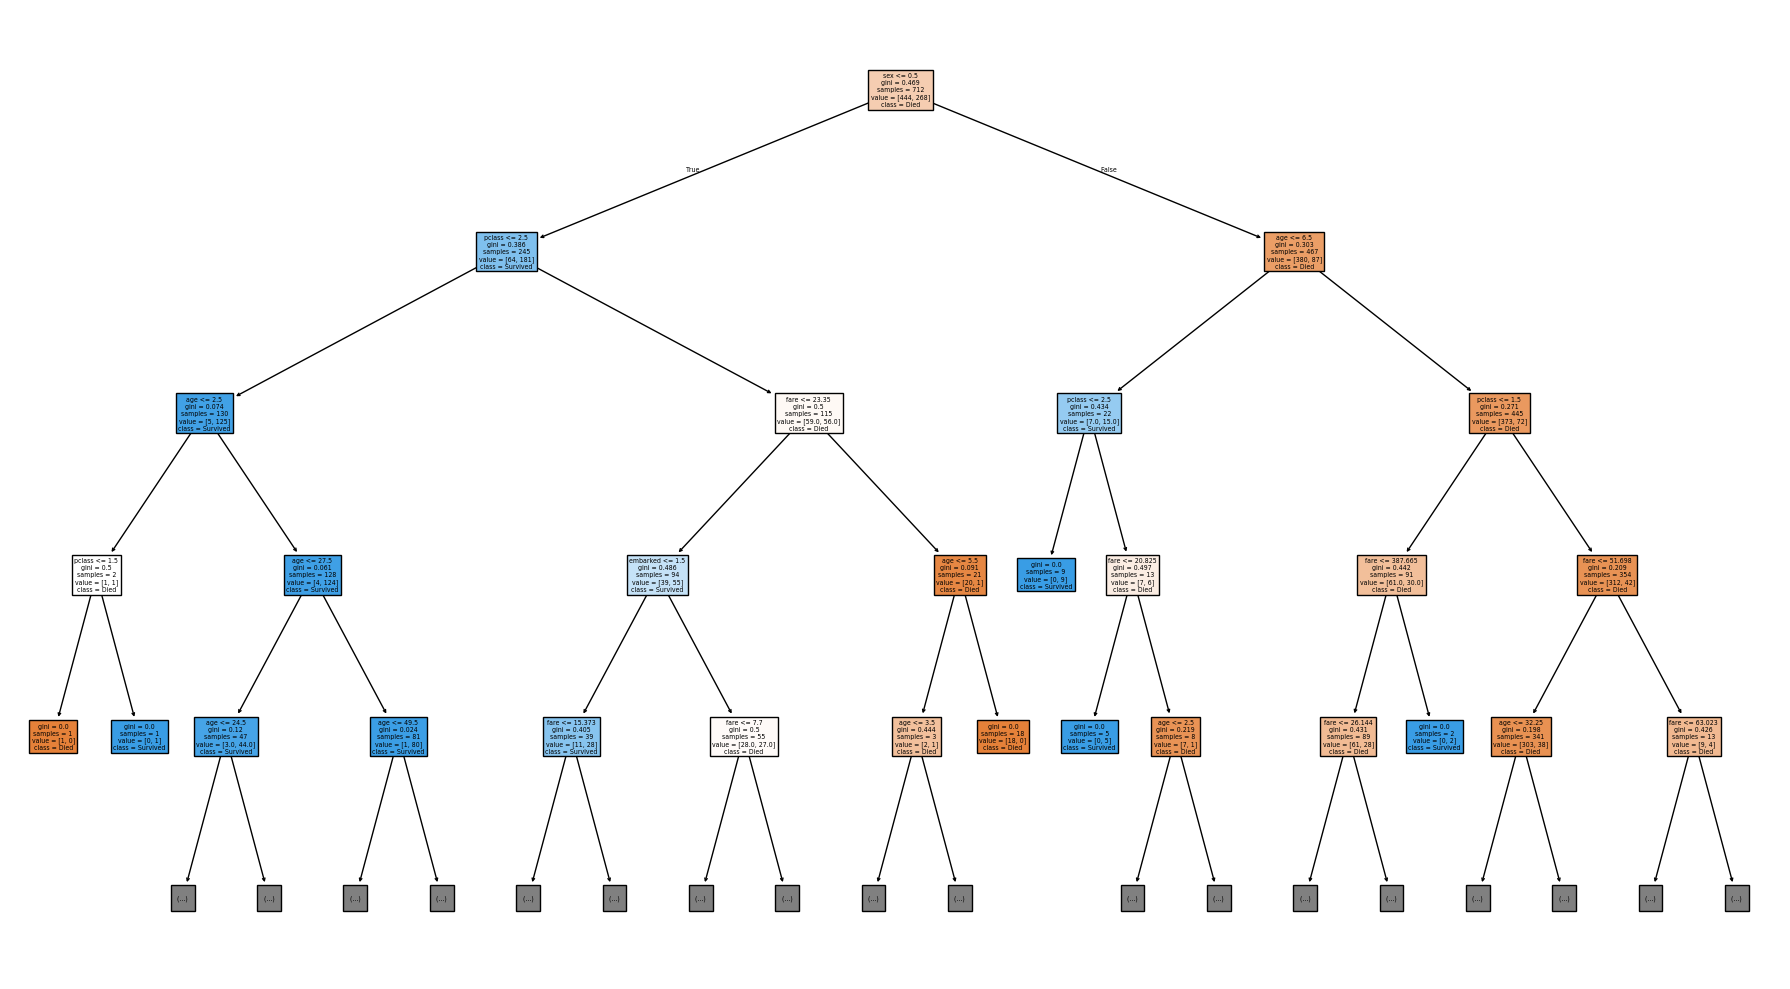

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize = (18, 10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    max_depth = 4
)

plt.tight_layout()
plt.show()

# Decision Tree with pre-pruning

for depth = 2, accuracy = 0.7653631284916201
for depth = 3, accuracy = 0.7988826815642458
for depth = 4, accuracy = 0.7988826815642458


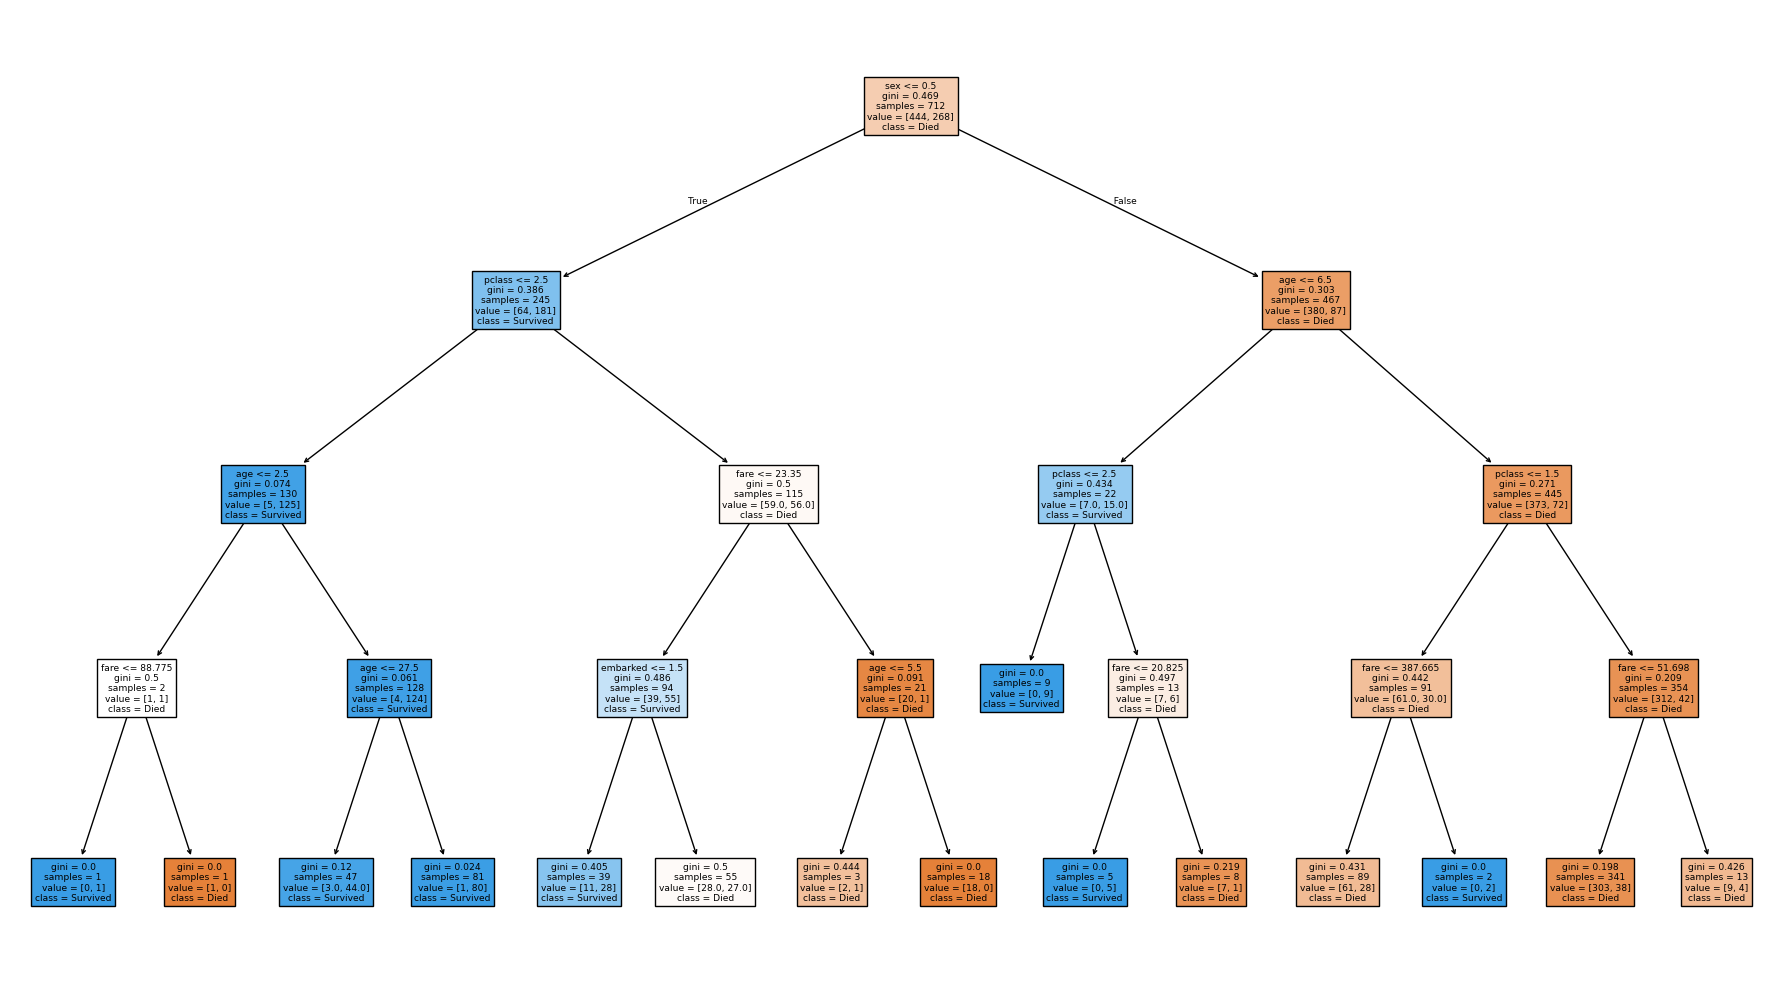

for depth = 5, accuracy = 0.7988826815642458
for depth = 6, accuracy = 0.7988826815642458
for depth = 7, accuracy = 0.7932960893854749
for depth = 8, accuracy = 0.7932960893854749
for depth = 9, accuracy = 0.7932960893854749
for depth = 10, accuracy = 0.7932960893854749


In [16]:
max_depths = [2,3,4,5,6,7,8,9,10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth = {depth}, accuracy = {acc}")


    if depth == 4:
        plt.figure(figsize = (18, 10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
            
        )
        
        plt.tight_layout()
        plt.show()
        
        

for split = 10, accuracy = 0.7988826815642458


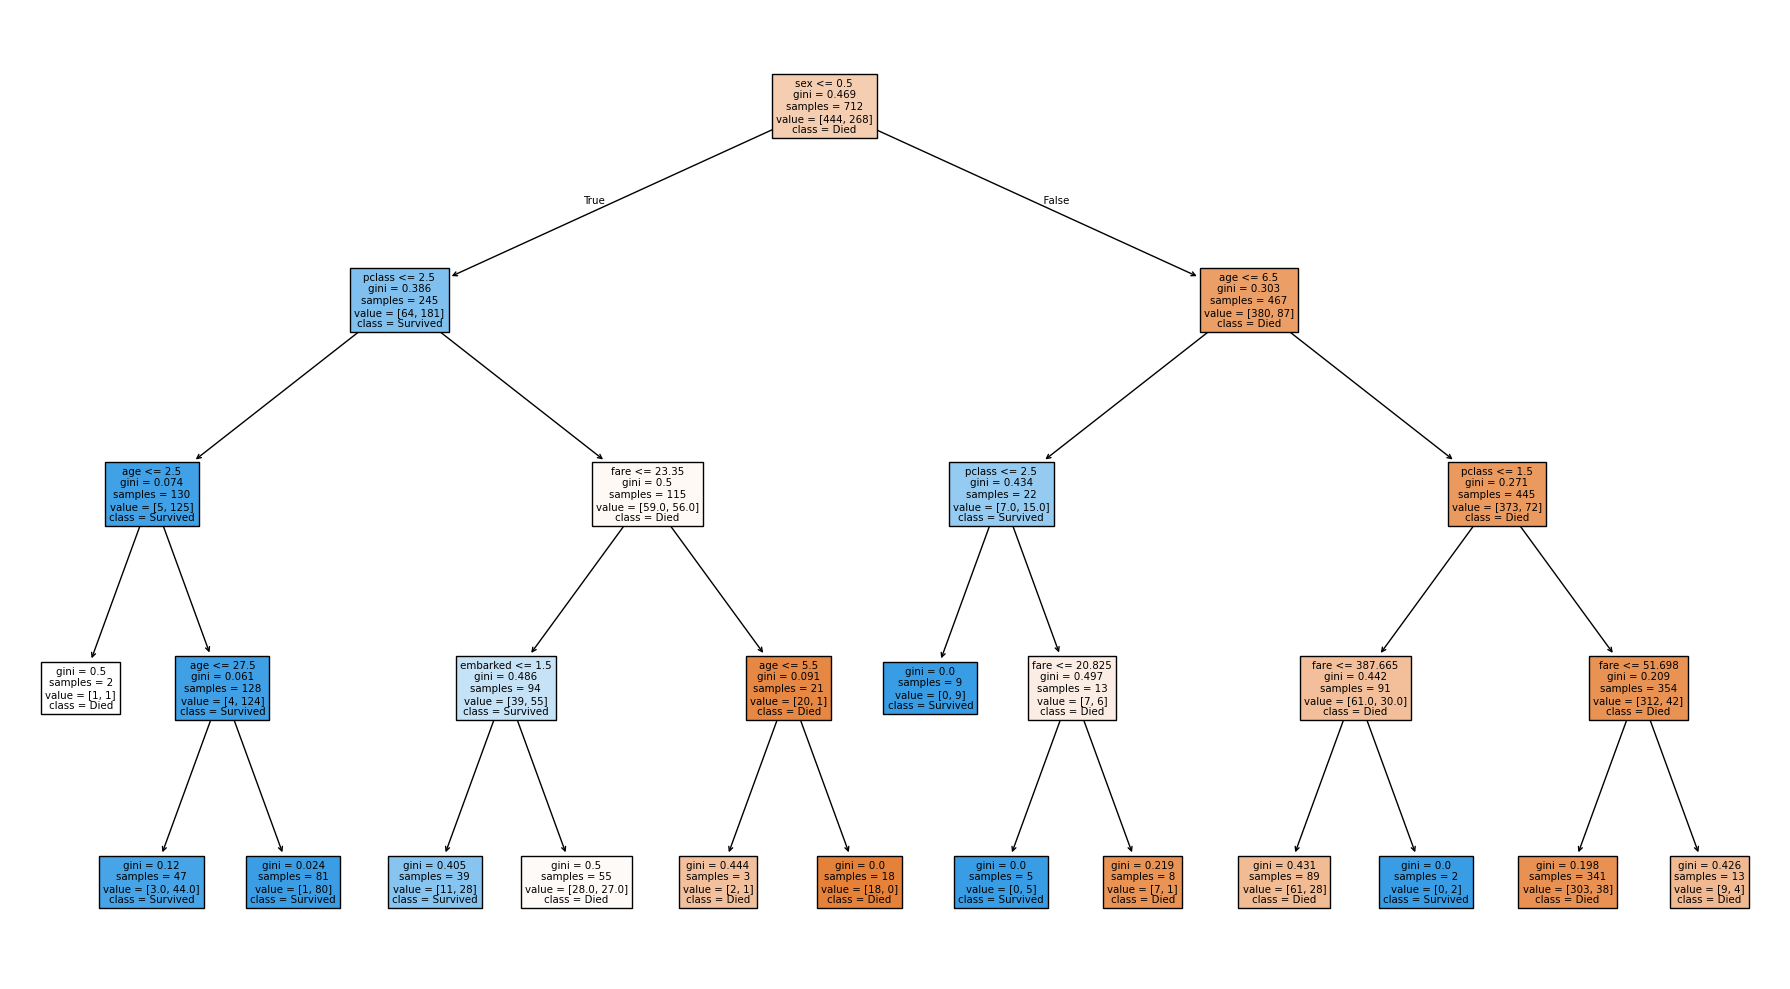

for split = 15, accuracy = 0.7988826815642458
for split = 20, accuracy = 0.7988826815642458
for split = 25, accuracy = 0.7932960893854749
for split = 30, accuracy = 0.7932960893854749


In [17]:

min_samples_split = [10, 15, 20, 25, 30]

for split in min_samples_split:
    model = DecisionTreeClassifier(max_depth = 4, min_samples_split = split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for split = {split}, accuracy = {acc}")

    if split == 10:
        plt.figure(figsize = (18, 10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
            
        )
        
        plt.tight_layout()
        plt.show()
        

# Decision tree with post-pruning

In [18]:
full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [23]:
# train our model for all alphas 

trees = []
for alpha in ccp_alphas:
    model =  DecisionTreeClassifier(random_state = 42, ccp_alpha = alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))
    



In [24]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc =  model.score(X_test, y_test)
    if curr_acc > best_acc :
        best_acc = curr_acc
        best_alpha = alpha

In [26]:
best_acc 

0.8379888268156425

In [27]:
best_model = DecisionTreeClassifier(random_state = 42, ccp_alpha = best_alpha)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0015407231242023183),
                       random_state=42)

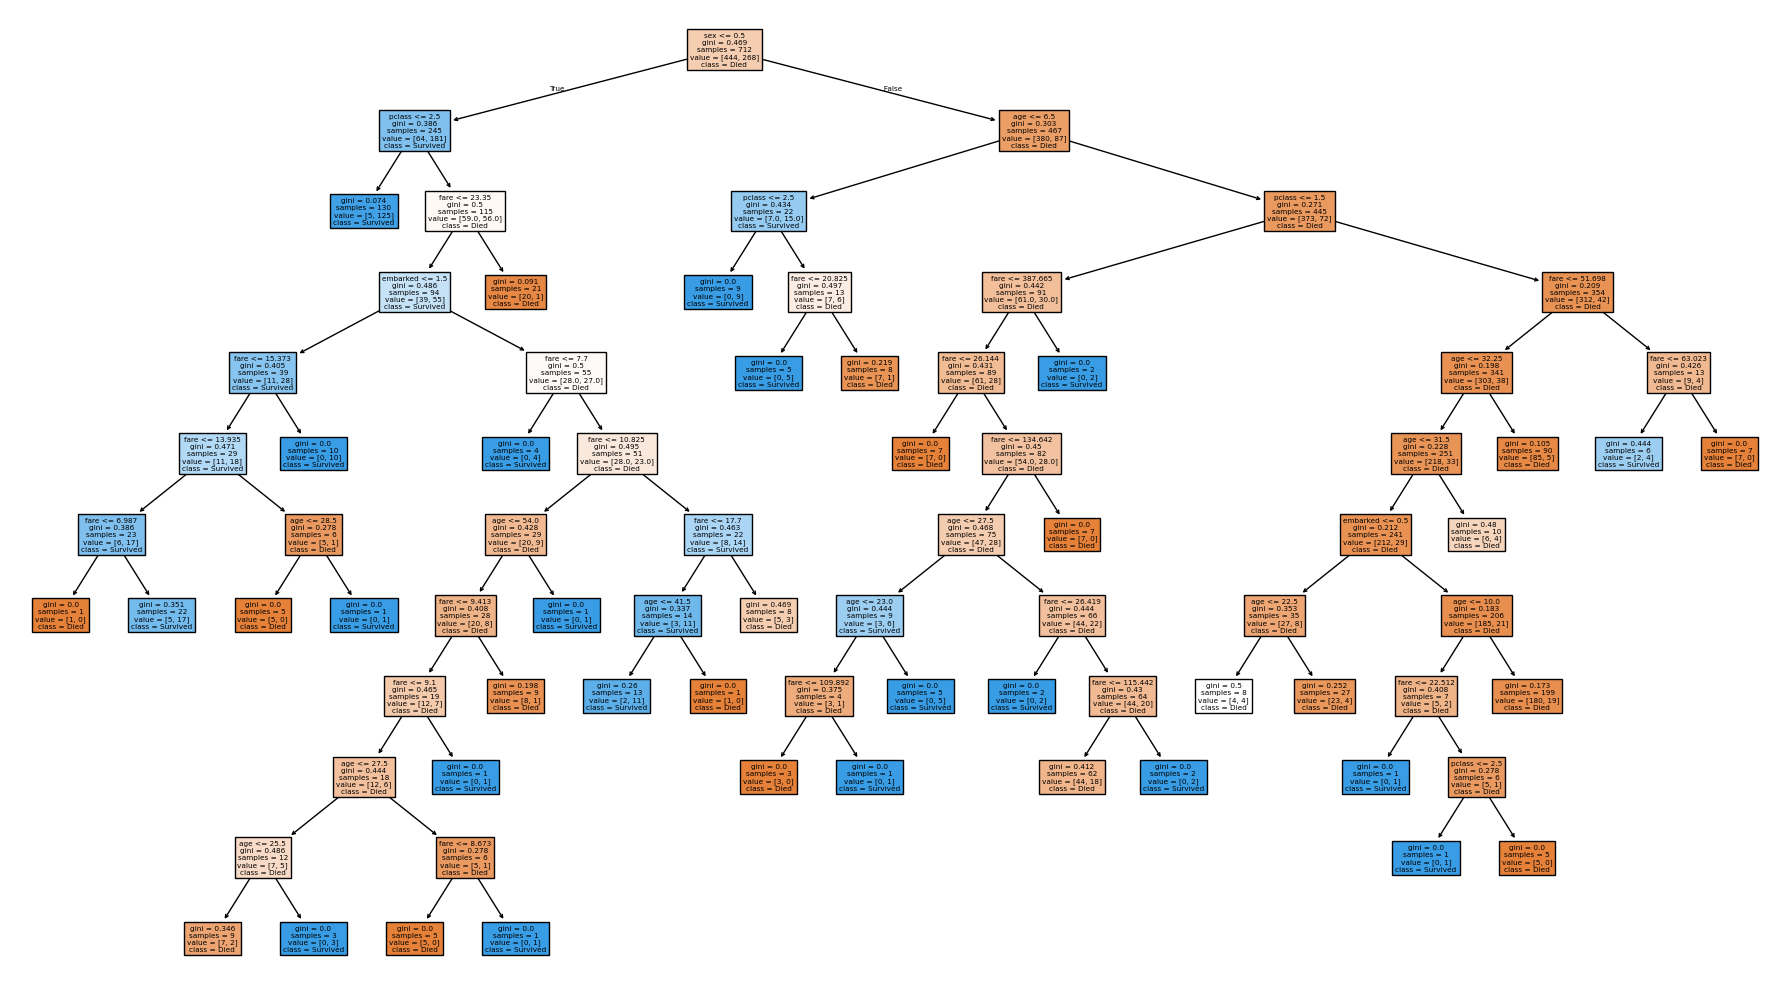

In [28]:
plt.figure(figsize = (18, 10))
plot_tree(
        best_model,
        feature_names = X.columns,
        class_names = ["Died","Survived"],
        filled = True,
            
)
        
plt.tight_layout()
plt.show()